<a href="https://colab.research.google.com/github/pena-rodrigo/tutorial_classification/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial for classification using deep learning

#### First, let's load the packages we need. We will rely on PyTorch. PyTorch has built-in neural networks and functions that we use for our classification. It works with tensors which are multi-dimensional matrices. So all the data has to be converted to Tensors. 

In [1]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pylab as plt
import numpy as np

#### We will also use a dataset called MNIST which contains several handwritten digits. Our goal will be to classify the handwritten digits. Let's load this dataset and separate it into training and validation.

In [2]:
import torchvision.datasets as dsets

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
print("Print the training dataset:\n ", train_dataset)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Print the training dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [3]:
validation_dataset = dsets.MNIST(root='./data', download=True, transform=transforms.ToTensor())
print("Print the validating dataset:\n ", validation_dataset)

Print the validating dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


#### Now let's check our data. The following cells show the labels and the image for that label. Remember that we are working with a supervised learning approach and therefore we needed labeled data.

In [4]:
# Print the label

print("The label: ", train_dataset[4][1])

The label:  9


The image:  None


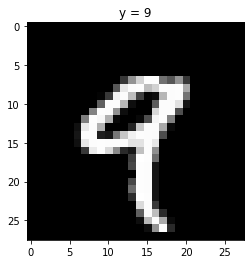

In [5]:
# Plot the image

def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.title('y = ' + str(data_sample[1]))

print("The image: ", show_data(train_dataset[4]))

#### In the following, we create the model we will use to train. We will create an input layer and an output layer.

In [6]:
# Define softmax classifier class

class SoftMax(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(SoftMax, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    # Prediction
    def forward(self, x):
        z = self.linear(x)
        return z

#### Next, when we check our data we see that the image is 28x28. Therefore, we need to define the size of the input layer 28x28. The output layer will be 10 because we will classify 10 digits (from 0 to 9).

In [7]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [8]:
# Set input size and output size

input_dim = 28 * 28
output_dim = 10

#### We can now create the model and print it to check if everything is ok.

In [11]:
# Create the model

model = SoftMax(input_dim, output_dim)
print("Print the model:\n ", model)

Print the model:
  SoftMax(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


 #### Remember that a linear equation (a neuron) is of the form y = w*x + b, where w is the weight and b the bias. We can also check how many of those we have.

In [12]:
# Print the parameters

print('w: ',list(model.parameters())[0].size())
print('b: ',list(model.parameters())[1].size())

w:  torch.Size([10, 784])
b:  torch.Size([10])


#### The following cell defines functions that will run our network. We will define the learning rate, the Gradient descent, and the Loss function, and load the datasets in formats that will be fed to our network.




In [13]:
# Define the learning rate, optimizer, criterion and data loader

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

#### Finally, this is the most important cell where we train the model over a number of epochs. Notice that at every step we compute the loss and do backpropagation. We also validate the model by comparing how it performs with our validation data and checking its accuracy.

In [14]:
# Train the model

n_epochs = 10
loss_list = []
accuracy_list = []
N_test = len(validation_dataset)

def train_model(n_epochs):
    for epoch in range(n_epochs):
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            
        correct = 0
        # perform a prediction on the validation data  
        for x_test, y_test in validation_loader:
            z = model(x_test.view(-1, 28 * 28))
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        loss_list.append(loss.data)
        accuracy_list.append(accuracy)

train_model(n_epochs)

#### And we can plot the training so we know how it went. The blue curve is the accuracy and you can observe that it improves at every epoch up to 92%. The red curve is the Loss function and you can see that it decreases.

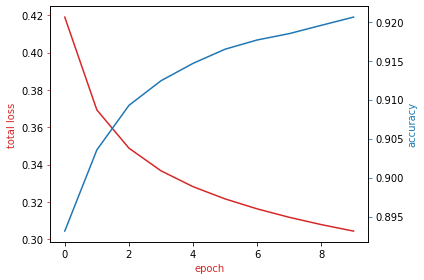

In [15]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()